# Cardio Fitness Data Analysis

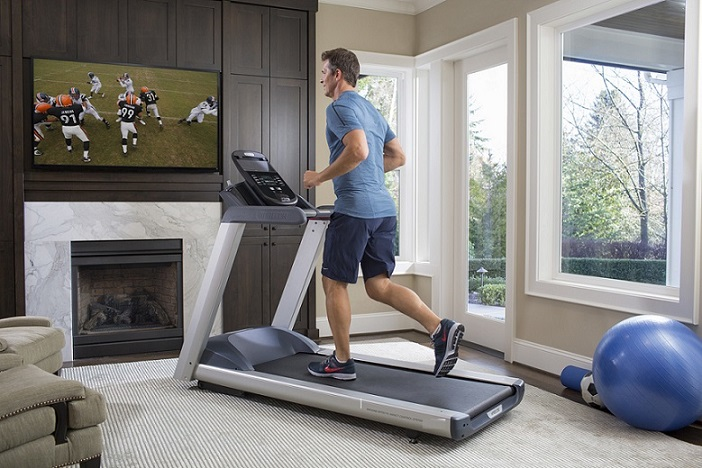

https://www.kaggle.com/ujoshi076/descriptive-analysis-cardio-fitness-data-eda/data

This data is collected on individuals who purchased a treadmill at a CardioGoodFitness retail store during the prior three months. 

- Product - the model number of the treadmill

- Age - in number of years, of the customer

- Gender - of the customer

- Education - in number of years, of the customer

- Marital Status - customer's marital status

- Usage - average number of times the customer uses the treadmill every week

- Fitness - self-rated fitness score of the customer (5 - very fit, 1 - very unfit)

- Income - customers income

- Miles - expected to run

### Importing necessary libraries and loading dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv("CardioGoodFitness.csv")

In [3]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [4]:
df.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


### Data exploring

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [6]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [7]:
df.duplicated().sum()

0

The dataset has 180 rows and 9 columns.<br>  There is no mising and duplicated values.

### Analysing data

In [8]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [9]:
pd.DataFrame(df.Product.value_counts())

,Product
TM195,80
TM498,60
TM798,40


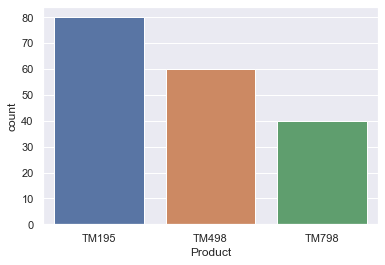

In [10]:
sns.countplot(x=df["Product"], data=df);

The most pouplar product is TM195 - sold 80 pcs.

### Age and gender of customers

In [11]:
pd.DataFrame(df.Gender.value_counts())

,Gender
Male,104
Female,76


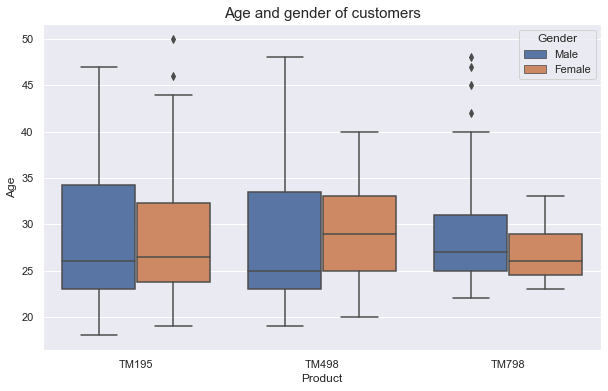

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df.Product, y=df.Age, hue=df.Gender)
plt.title("Age and gender of customers", fontsize=15);

Among buyers, the number of males (104) exceed the number of females (76). An approximate age of most customers is between 23 and 34.

### Education and marital status of customers

In [13]:
pd.DataFrame(df.Education.value_counts())

,Education
16,85
14,55
18,23
15,5
13,5
12,3
21,3
20,1


Around 78% of customers have 14-16 years education.

In [14]:
pd.DataFrame(df.MaritalStatus.value_counts())

,MaritalStatus
Partnered,107
Single,73


Marital status of customers.

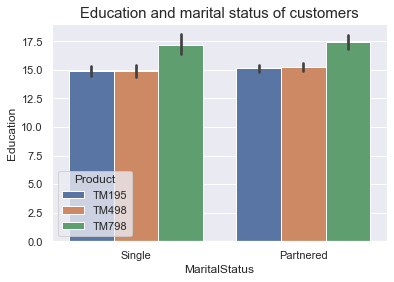

In [15]:
sns.barplot(x=df.MaritalStatus, y=df.Education, hue=df.Product)
plt.title("Education and marital status of customers", fontsize=15);

There is no big difference between both groups of customers. However, TM798 customers are slightly more educated.

### Usage of tredmills

In [16]:
pd.DataFrame(df.Usage.value_counts())

,Usage
3,69
4,52
2,33
5,17
6,7
7,2


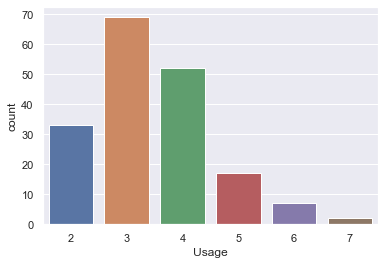

In [17]:
sns.countplot(x=df["Usage"], data=df);

Most customers are planning to use tredmills 3-4 times a week.

### Self-rated fitness score of the customer

In [18]:
pd.DataFrame(df.Fitness.value_counts(normalize=True).round(2))

,Fitness
3,0.54
5,0.17
2,0.14
4,0.13
1,0.01


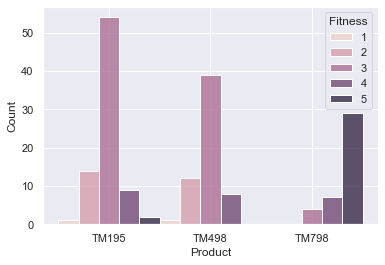

In [19]:
sns.histplot(x='Product',data=df, hue='Fitness', multiple="dodge");

Many clients (84%) consider their self-rated fitness score to be average or above average (5 - very fit, 1 - very unfit).

### Customers income

In [20]:
df.groupby("Product")["Income"].agg(["count", "mean"])

,count,mean
Product,,
TM195,80,46418.025
TM498,60,48973.650
TM798,40,75441.575


The average income of TM798 buyers is higher.

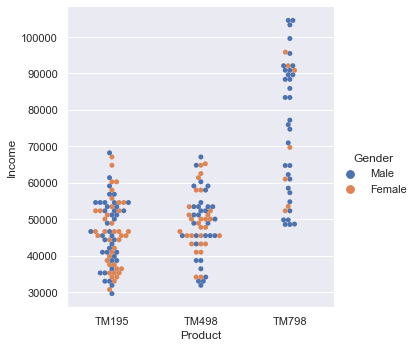

In [21]:
sns.catplot(x="Product", y="Income", kind="swarm", hue="Gender", data=df);

The buyers of TM195 and TM498 are people with incomes less than 70000.<br>  TM798 is bought more by people whose income is from 49000 to 105000 and most of them males.

### Correlation

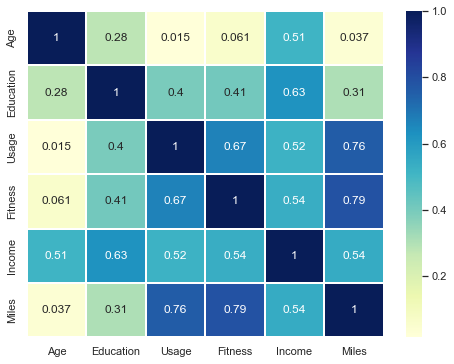

In [22]:
plt.figure(figsize=(8, 6))
sns.heatmap(data=df.corr(),cmap="YlGnBu", annot=True ,linewidths=0.2, linecolor='white');

Age, Education, Usage, Fitness and Miles has a significant correlation with Income and vice versa.<br> Usage and Fitness are highly correlated with Miles and vice versa.

### Conclusion

* The dataset has 180 rows and 9 columns. There is no mising and duplicated values.
* The most pouplar product is TM195 - sold 80 pcs.
* Among buyers, the number of males (104) exceed the number of females (76). An approximate age of most customers is between 23 and 34.
* Around 78% of customers have 14-16 years education.
* There is no big difference between education and marital status of customers. However, TM798 customers are slightly more educated.
* Most customers (121) are planning to use tredmills 3-4 times a week.
* Many clients (84%) consider their self-rated fitness score to be average or above average (5 - very fit, 1 - very unfit).
* The average income of TM798 buyers is higher.
* The buyers of TM195 and TM498 are people with incomes less than 70000.
* TM798 is bought more by people whose income is from 49000 to 105000 and most of them males.
* Age, Education, Usage, Fitness and Miles has a significant correlation with Income and vice versa.
* Usage and Fitness are highly correlated with Miles and vice versa.